In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import QuantLib as ql

In [2]:
def set_unit_squzre(ax):
    ax.axis('scaled')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

In [3]:
rng = ql.MersenneTwisterUniformRng(42)
xs = []
ys = []
for i in range(2047):
    xs.append(rng.next().value())
    ys.append(rng.next().value())

In [4]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
set_unit_squzre(ax)
ax.plot(xs, ys, 'o')

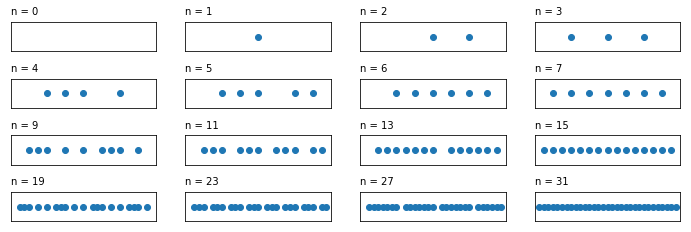

In [5]:
fig = plt.figure(figsize=(12, 4))
for i, n in enumerate([0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 15, 19, 23, 27, 31]):
    rng = ql.SobolRsg(1)
    xs = [rng.nextSequence().value()[0] for j in range(n)]
    ax = fig.add_subplot(4, 4, i+1)
    ax.axis('scaled')
    ax.set_xlim([0, 1])
    ax.set_ylim([-0.1, 0.1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.plot(xs, [0]*len(xs), 'o')
    ax.text(0.0, 0.15, 'n = %d' % n)

In [6]:
rng = ql.SobolRsg(1)

In [8]:
xs = []
ys = []
for i in range(2047):
    xs.append(rng.nextSequence().value())
    ys.append(rng.nextSequence().value())

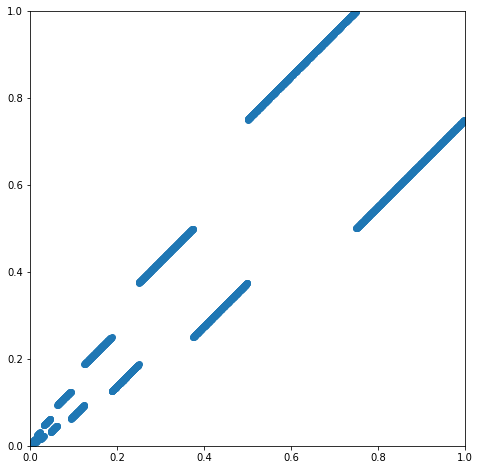

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
set_unit_squzre(ax)
ax.plot(xs, ys, 'o')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


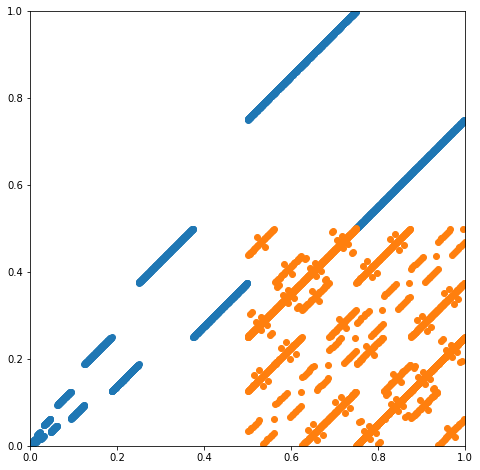

In [10]:
rng = ql.SobolRsg(2)
xs = []
ys = []
for i in range(2047):
    xs.append(rng.nextSequence().value())
    ys.append(rng.nextSequence().value())
    fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
set_unit_squzre(ax)
ax.plot(xs, ys, 'o')

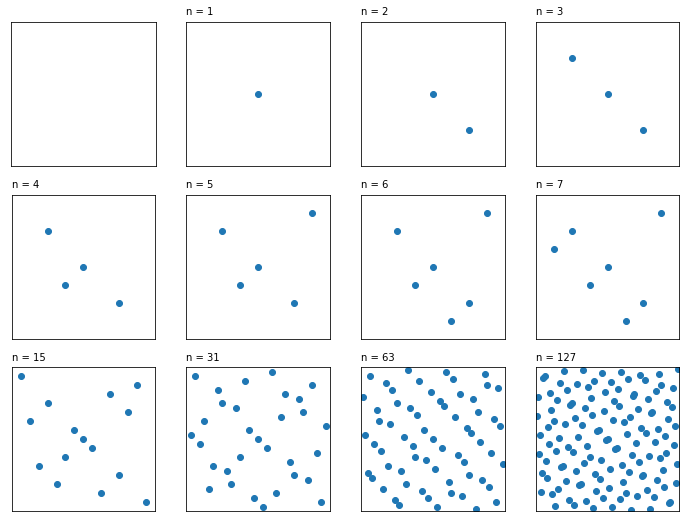

In [11]:
fig = plt.figure(figsize=(12, 9))
for i, n in enumerate([0, 1, 2, 3, 4, 5, 6, 7, 15, 31, 63, 127]):
    rng = ql.SobolRsg(2)
    ax = fig.add_subplot(3, 4, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    if n == 0:
        continue
    points = [rng.nextSequence().value() for j in range(n)]
    xs, ys = zip(*points)
    ax.axis('scaled')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.plot(xs, ys, 'o')
    ax.text(0.0, 1.05, 'n = %d' % n)

In [13]:
today = ql.Date(27, ql.January, 2018)
ql.Settings.instance().evaluationDate = today
risk_free = ql.YieldTermStructureHandle(ql.FlatForward(today, 0.01, ql.Actual360()))

processes = [ql.BlackScholesProcess(ql.QuoteHandle(ql.SimpleQuote(S)), risk_free, ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.TARGET(), sigma, ql.Actual360()))) for S, sigma in [(100, 0.20), (80, 0.25), (110, 0.18)]]

In [14]:
rho = [[1.0, 0.6, 0.8], [0.6, 1.0, 0.4], [0.8, 0.4, 1.0]]
process = ql.StochasticProcessArray(processes, rho)
print(process.factors())

3


In [17]:
def rng(dimensionality):
    return ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(dimensionality, ql.UniformRandomGenerator(42)))
times = [0.25, 0.50, 0.75, 1.0]
generator = ql.GaussianMultiPathGenerator(process, times, rng(10))

RuntimeError: dimension (10) is not equal to (3 * 4) the number of factors times the number of time steps

In [18]:
generator = ql.GaussianMultiPathGenerator(process, times, rng(12))

In [19]:
sample = generator.next().value()

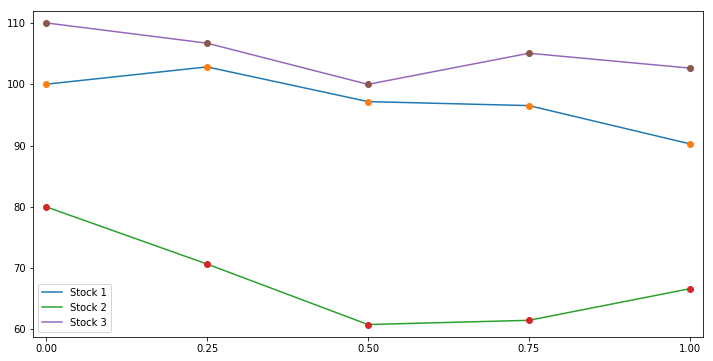

In [22]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ts = [0.0] + times
y_min = 80
y_max = 110
for i in range(3):
    p = ax.plot(ts, sample[i], label='Stock %d' % (i+1))
    ax.plot(ts, sample[i], 'o')
    y_min = min(y_min, min(sample[i]))
    y_max = max(y_max, max(sample[i]))
ax.set_xlim(0.0-0.02, 1.0+0.02)
ax.set_xticks(ts)
ax.set_ylim(y_min-2, y_max+2)
ax.legend(loc='best')